In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
from scipy import stats
from collections import OrderedDict

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA 
from sklearn.metrics import adjusted_rand_score
from statsmodels.sandbox.stats.multicomp import multipletests 

from snmcseq_utils import plot_tsne_values
from snmcseq_utils import plot_tsne_labels
from snmcseq_utils import tsne_and_boxplot

In [49]:
clf1 = '/cndd/fangming/snmcseq_dev/data/cluster/cluster_MB_v1_MB_EA_MB_EB/clusters_v1_binc_mCH_louvain.tsv'
clf2 = '/cndd/fangming/snmcseq_dev/data/cluster/cluster_MB_v1_MB_EA_MB_EB/old/clusters_binc_mCHmCG_human_combined_100000_summary_normalized.tsv'

annotf1 = '/cndd/fangming/snmcseq_dev/data/cluster/cluster_MB_v1_MB_EA_MB_EB/clusters_v1_binc_mCH_louvain_annotation.tsv'
annotf2 = '/cndd/fangming/snmcseq_dev/data/cluster/cluster_MB_v1_MB_EA_MB_EB/old/cluster_MB_v1_MB_EA_MB_EB_annotation.tsv'

In [50]:
df_cl1 = pd.read_table(clf1, index_col='sample').sort_index()
df_cl2 = pd.read_table(clf2, index_col='sample').sort_index() 
print(df_cl1.shape)
print(df_cl2.shape)
df_cl2.head()


(6435, 1)
(6435, 1)


,cluster_ID
sample,
160729_MB_v1_hs_25yr_MFG_pool_1000_AD008_indexed,cluster_4
160729_MB_v1_hs_25yr_MFG_pool_1000_AD010_indexed,cluster_15
160729_MB_v1_hs_25yr_MFG_pool_1001_AD008_indexed,cluster_13
160729_MB_v1_hs_25yr_MFG_pool_1001_AD010_indexed,cluster_51
160729_MB_v1_hs_25yr_MFG_pool_1002_AD010_indexed,cluster_62


In [51]:
df_annot1 = pd.read_table(annotf1, index_col='cluster_ID') 
df_annot2 = pd.read_table(annotf2, index_col='cluster_ID') 
print(df_annot1.shape)
print(df_annot2.shape)
df_annot2.head()

(32, 1)
(67, 1)


,cluster_annotation
cluster_ID,
cluster_1,hSst-2
cluster_2,hSst-2
cluster_3,hSst-2
cluster_4,hSst-2
cluster_5,hSst-3


In [52]:
df_clannot1 = pd.merge(df_cl1, df_annot1, left_on='cluster_ID', right_index=True).sort_index()
df_clannot2 = pd.merge(df_cl2, df_annot2, left_on='cluster_ID', right_index=True).sort_index()
print(df_clannot1.shape)
print(df_clannot2.shape)
df_clannot1.head()

(6435, 2)
(6435, 2)


,cluster_ID,cluster_annotation
sample,,
160729_MB_v1_hs_25yr_MFG_pool_1000_AD008_indexed,cluster_8,hSst-2
160729_MB_v1_hs_25yr_MFG_pool_1000_AD010_indexed,cluster_5,hPv-1
160729_MB_v1_hs_25yr_MFG_pool_1001_AD008_indexed,cluster_5,hPv-1
160729_MB_v1_hs_25yr_MFG_pool_1001_AD010_indexed,cluster_4,hL2/3
160729_MB_v1_hs_25yr_MFG_pool_1002_AD010_indexed,cluster_26,hL6-3


In [60]:
# adjusted_rand_score(df_clannot1.cluster_annotation, df_clannot2.cluster_annotation)
s1, s1_ind = pd.factorize(df_clannot1.cluster_ID)
s2, s2_ind = pd.factorize(df_clannot2.cluster_ID)
res1 = adjusted_rand_score(s1, s2)

s1, s1_ind = pd.factorize(df_clannot1.cluster_annotation)
s2, s2_ind = pd.factorize(df_clannot2.cluster_annotation)
res2 = adjusted_rand_score(s1, s2)

print(res1, res2)

0.66426260262 0.911618777898


In [64]:
# eyeballing tSNE clustering results
f_tsne = '/cndd/fangming/snmcseq_dev/data/tsne/tsne_perp30_binc_mCH_human_combined_100000_summary_nmcc_v3.tsv'
df_tsne = pd.read_table(f_tsne, index_col='sample').sort_index()
df_tsne.head()

,tsne_x,tsne_y
sample,,
160729_MB_v1_hs_25yr_MFG_pool_1000_AD008_indexed,-4.877054,69.676521
160729_MB_v1_hs_25yr_MFG_pool_1000_AD010_indexed,-9.039734,42.487274
160729_MB_v1_hs_25yr_MFG_pool_1001_AD008_indexed,-16.972353,44.029213
160729_MB_v1_hs_25yr_MFG_pool_1001_AD010_indexed,1.754878,-44.023613
160729_MB_v1_hs_25yr_MFG_pool_1002_AD010_indexed,32.351906,-0.929139


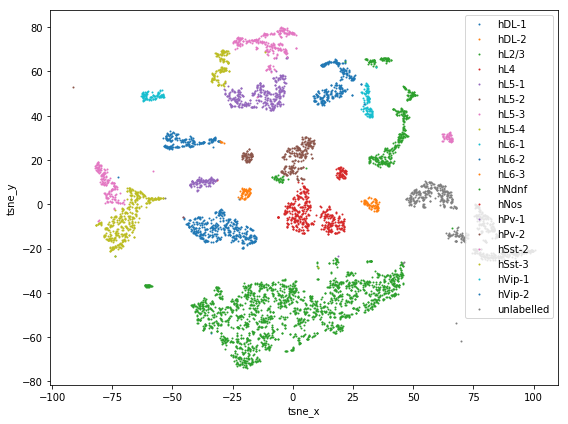

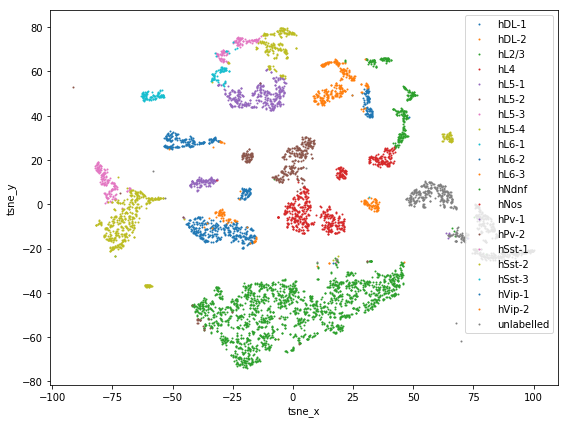

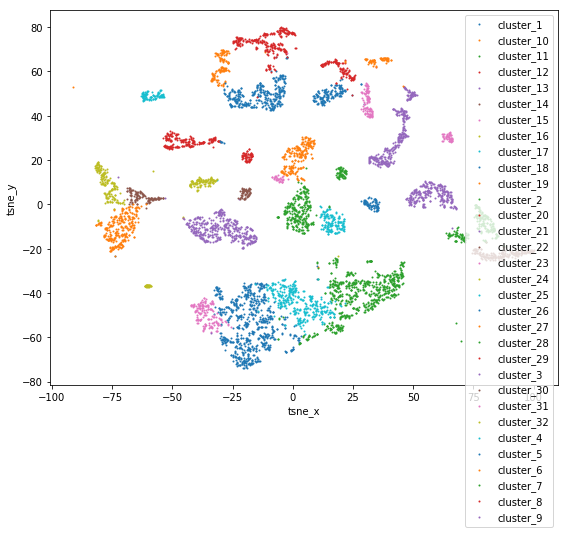

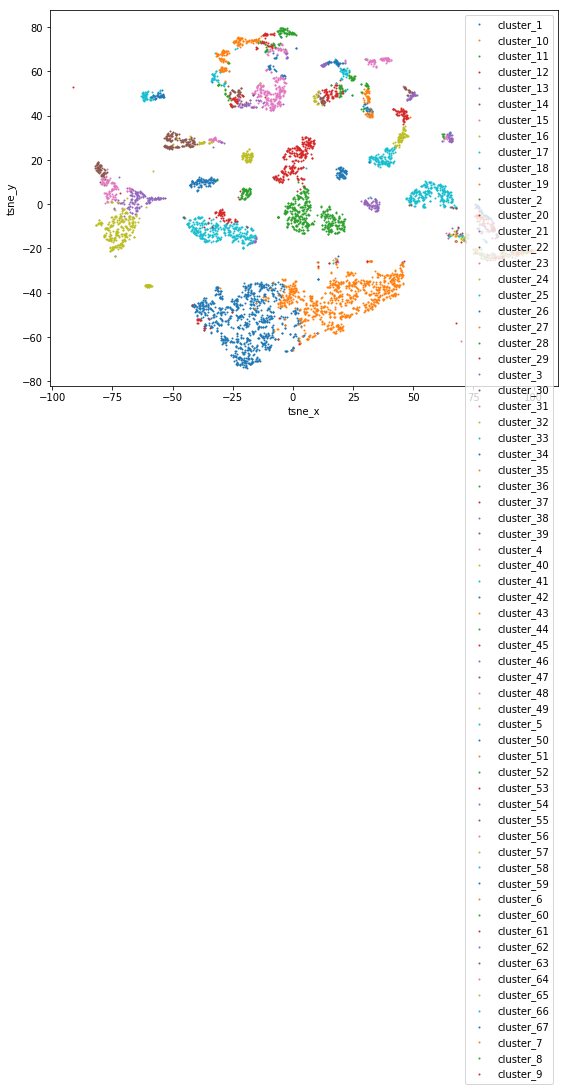

In [68]:
df_plot = pd.merge(df_tsne, df_clannot1, left_index=True, right_index=True)
plot_tsne_labels(df_plot, tc='cluster_annotation')
df_plot = pd.merge(df_tsne, df_clannot2, left_index=True, right_index=True)
plot_tsne_labels(df_plot, tc='cluster_annotation')
df_plot = pd.merge(df_tsne, df_clannot1, left_index=True, right_index=True)
plot_tsne_labels(df_plot, tc='cluster_ID')
df_plot = pd.merge(df_tsne, df_clannot2, left_index=True, right_index=True)
plot_tsne_labels(df_plot, tc='cluster_ID')